In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
# Cargar las imágenes para el entrenamiento
train_generator = train_datagen.flow_from_directory(
    '/home/fernando/Escritorio/inteligencia_artificial/entrenamiento_2do_parcial/marcadores/train/',  # Ruta al directorio de entrenamiento
    target_size=(224, 224),  # Tamaño de las imágenes de entrada
    batch_size=64,  # Tamaño del lote
    class_mode='categorical'  # Multiclase (4 clases: rojo, azul, negro, borrador)
)

# Cargar las imágenes para la validación
validation_generator = validation_datagen.flow_from_directory(
    '/home/fernando/Escritorio/inteligencia_artificial/entrenamiento_2do_parcial/marcadores/valid/',  # Ruta al directorio de validación
    target_size=(224, 224),  # Tamaño de las imágenes de entrada
    batch_size=32,  # Tamaño del lote
    class_mode='categorical'  # Multiclase
)

Found 2676 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [27]:
# 1. Preprocesamiento de imágenes: Definir generadores para cargar las imágenes
train_datagen = ImageDataGenerator(rescale=1./255)  # Normaliza las imágenes entre 0 y 1
validation_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# 2. Definición del Modelo CNN
model = models.Sequential()

# Capa 1: Capa convolucional + pooling
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Imagen RGB de entrada
model.add(layers.MaxPooling2D((2, 2)))

# Capa 2: Capa convolucional + pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Capa 3: Capa convolucional + pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida de la última capa convolucional
model.add(layers.Flatten())

# Capa densa para la cl asificación
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(4, activation='softmax'))  # 4 clases: rojo, azul, negro, borrador

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 128)  │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,242,820 (42.89 MB)

 Trainable params: 11,242,820 (42.89 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
 #3. Entrenamiento del Modelo
history = model.fit(
    train_generator,  # Generador de datos de entrenamiento
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Pasos por época
    epochs=20,  # Número de épocas
    validation_data=validation_generator,  # Datos de validación
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Pasos de validación
)

/usr/lib/python3/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.3640 - loss: 1.5350 - val_accuracy: 0.9777 - val_loss: 0.1801
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9375 - loss: 0.2357

2024-11-25 20:00:37.848321: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-11-25 20:00:37.848353: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9375 - loss: 0.2357 - val_accuracy: 0.9375 - val_loss: 0.1975
Epoch 3/20


2024-11-25 20:00:38.296909: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:38.296940: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9435 - loss: 0.1765 - val_accuracy: 0.9955 - val_loss: 0.0160
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 1.0000 - loss: 0.0311 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 5/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.9531 - loss: 0.0922

2024-11-25 20:00:42.663805: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:42.663845: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9763 - loss: 0.0604 - val_accuracy: 0.9955 - val_loss: 0.0192
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0412
Epoch 7/20


2024-11-25 20:00:47.421952: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:47.421992: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:00:47.493559: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:47.493615: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9892 - loss: 0.0347 - val_accuracy: 0.9955 - val_loss: 0.0110
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9375 - val_loss: 0.0494
Epoch 9/20


2024-11-25 20:00:52.276283: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:52.276336: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:00:52.348363: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:52.348411: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9905 - loss: 0.0387 - val_accuracy: 0.9777 - val_loss: 0.0481
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0288
Epoch 11/20


2024-11-25 20:00:56.632307: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:56.632341: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:00:56.703917: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:00:56.703961: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.9955 - val_loss: 0.0142
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 2.1748e-04
Epoch 13/20


2024-11-25 20:01:00.840220: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:00.840244: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:01:00.911034: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-11-25 20:01:00.911074: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:00.911088: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9974 - loss: 0.0176 - val_accuracy: 0.9955 - val_loss: 0.0079
Epoch 14/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 2.2054e-06
Epoch 15/20


2024-11-25 20:01:05.003235: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:05.003270: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:01:05.073673: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:05.073711: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9955 - val_loss: 0.0135
Epoch 16/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 3.9770e-04
Epoch 17/20


2024-11-25 20:01:09.077363: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:09.077405: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:01:09.148031: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:09.148070: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9964 - loss: 0.0091 - val_accuracy: 0.9821 - val_loss: 0.0279
Epoch 18/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 7.1954e-05
Epoch 19/20


2024-11-25 20:01:13.331323: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:13.331355: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:01:13.403075: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:13.403117: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9996 - loss: 0.0043 - val_accuracy: 0.9955 - val_loss: 0.0078
Epoch 20/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 1.0000 - loss: 4.0867e-04 - val_accuracy: 1.0000 - val_loss: 1.7090e-05


2024-11-25 20:01:17.590427: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:17.590491: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002
2024-11-25 20:01:17.643591: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3645363734080797160
2024-11-25 20:01:17.643629: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15442995500272283002


In [21]:
# 4. Evaluación del Modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Accuracy en el conjunto de validación: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9901 - loss: 0.0159
Accuracy en el conjunto de validación: 0.9958333373069763


In [22]:
# Especificar la ruta completa para guardar el modelo
model.save('/home/fernando/Escritorio/inteligencia_artificial/entrenamiento_2do_parcial/modelov1.keras')


Found 60 images belonging to 4 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9889 - loss: 0.1416      
Precisión en el conjunto de prueba: 98.33%
Pérdida en el conjunto de prueba: 0.2123
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


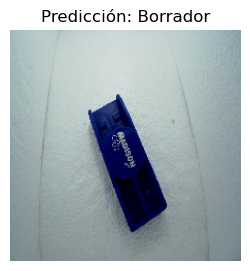

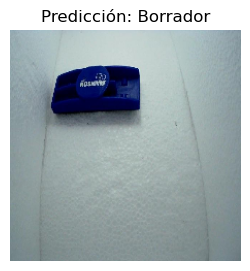

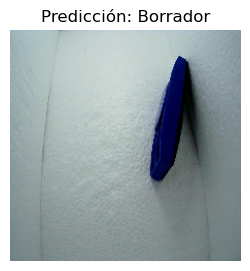

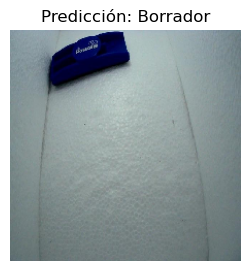

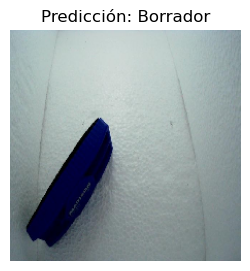

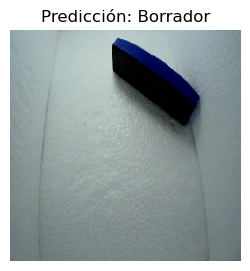

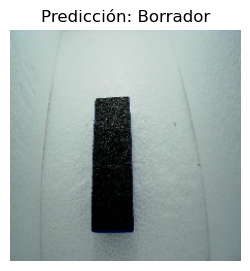

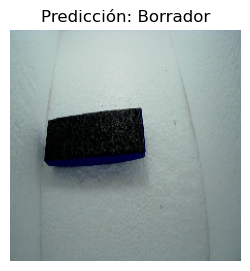

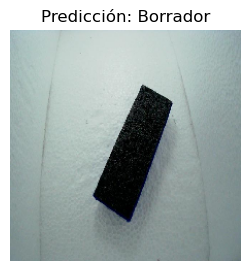

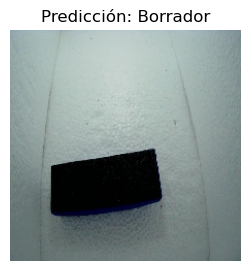

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np

# Cargar el modelo guardado
model = load_model('/home/fernando/Escritorio/inteligencia_artificial/entrenamiento_2do_parcial/modelov1.keras')

# Definir la ruta del directorio de prueba
test_dir = '/home/fernando/Escritorio/inteligencia_artificial/entrenamiento_2do_parcial/marcadores/test'  # Reemplaza con la ruta correcta

# Crear un generador de imágenes para cargar y preprocesar las imágenes del conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizar las imágenes de prueba

# Cargar las imágenes desde las subcarpetas, usando el generador
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Asegúrate de que el tamaño coincida con el usado en el entrenamiento
    batch_size=32,  # Tamaño de lote
    class_mode='categorical',  # Como estamos haciendo clasificación múltiple
    shuffle=False  # No mezclar las imágenes para mantener el orden
)

# Evaluar el modelo con las imágenes de prueba
loss, accuracy = model.evaluate(test_generator)

# Imprimir resultados de la evaluación
print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')

# Hacer predicciones con las imágenes del conjunto de prueba
predictions = model.predict(test_generator)

# Obtener las clases predichas para cada imagen
predicted_classes = np.argmax(predictions, axis=1)

# Mapear las clases a sus nombres (según el orden de las subcarpetas)
class_names = ['Borrador', 'Azul', 'Negro', 'Rojo']  # Asegúrate de que el orden coincida con tus subcarpetas

# Mostrar las clases predichas para las primeras 10 imágenes y las imágenes mismas
for i in range(10):
    # Obtener la imagen y normalizarla
    img = test_generator[i // test_generator.batch_size][0][i % test_generator.batch_size]
    
    plt.figure(figsize=(3, 3))
    plt.imshow(img)  # Mostrar la imagen
    plt.title(f'Predicción: {class_names[predicted_classes[i]]}')  # Título con la clase predicha
    plt.axis('off')  # Desactivar los ejes para que solo se vea la imagen
    plt.show()


In [5]:
import cv2
import tensorflow as tf
import numpy as np

# Cargar el modelo entrenado desde la dirección del segundo código
model = tf.keras.models.load_model("/home/fernando/Escritorio/inteligencia_artificial/entrenamiento_2do_parcial/modelov1.keras")

# Diccionario de etiquetas
etiquetas = {
    0: "Borrador",
    1: "Marcador Azul",
    2: "Marcador Negro",
    3: "Marcador Rojo",
    4: "Ninguno"
}

# Preprocesar cuadro
def preprocess_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Cambiar a RGB si es necesario
    frame_resized = cv2.resize(frame_rgb, (224, 224))  # Cambia según las dimensiones de entrada
    frame_normalized = frame_resized / 255.0  # Ajusta la normalización si es necesario
    return np.expand_dims(frame_normalized, axis=0)

# Inicializar la cámara
cap = cv2.VideoCapture(2)  # Mantener la cámara 2 como en el primer código
if not cap.isOpened():
    print("No se puede acceder a la cámara.")
    exit()

print("Presiona 'q' para salir.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("No se pudo leer el frame.")
        break

    preprocessed_frame = preprocess_frame(frame)
    
    # Depuración: verificar dimensiones y valores
    print(f"Dimensiones del cuadro preprocesado: {preprocessed_frame.shape}")

    prediction = model.predict(preprocessed_frame, verbose=0)
    print(f"Predicción completa: {prediction}")

    predicted_class = np.argmax(prediction, axis=1)[0]
    label = etiquetas.get(predicted_class, "Desconocido")
    print(f"Predicción: {label}")

    # Mostrar la predicción en el cuadro
    cv2.putText(frame, f"Prediccion: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Video en tiempo real', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Presiona 'q' para salir.
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[5.9619754e-09 9.1689426e-01 8.3105735e-02 4.8127568e-08]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)


[ WARN:0@2237.885] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


Predicción completa: [[5.9619754e-09 9.1689426e-01 8.3105735e-02 4.8127568e-08]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[5.9619754e-09 9.1689426e-01 8.3105735e-02 4.8127568e-08]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[5.7043690e-09 9.1780144e-01 8.2198568e-02 4.5866525e-08]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[2.7260491e-08 8.9464706e-01 1.0535266e-01 2.0085402e-07]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[3.0563788e-07 8.5978299e-01 1.4021491e-01 1.7898066e-06]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[5.668695e-07 8.468957e-01 1.531002e-01 3.501174e-06]]
Predicción: Marcador Azul
Dimensiones del cuadro preprocesado: (1, 224, 224, 3)
Predicción completa: [[5.6557184e-07 8